In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv(r"C:\Users\User\Downloads\breastcancerdata\data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}\n')

id: 569

diagnosis: 2

radius_mean: 456

texture_mean: 479

perimeter_mean: 522

area_mean: 539

smoothness_mean: 474

compactness_mean: 537

concavity_mean: 537

concave points_mean: 542

symmetry_mean: 432

fractal_dimension_mean: 499

radius_se: 540

texture_se: 519

perimeter_se: 533

area_se: 528

smoothness_se: 547

compactness_se: 541

concavity_se: 533

concave points_se: 507

symmetry_se: 498

fractal_dimension_se: 545

radius_worst: 457

texture_worst: 511

perimeter_worst: 514

area_worst: 544

smoothness_worst: 411

compactness_worst: 529

concavity_worst: 539

concave points_worst: 492

symmetry_worst: 500

fractal_dimension_worst: 535

Unnamed: 32: 0



In [15]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**EDA(Exploratory Data Analysis)**

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [24]:
df=df.drop('Unnamed: 32',axis=1)

In [26]:
df.duplicated().sum()

0

In [28]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [30]:
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [32]:
cancerous = df[df['diagnosis'] == 1]
non_cancerous = df[df['diagnosis'] == 0]

In [34]:
cancerous.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,1.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,1.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,1.0,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,1.0,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,1.0,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [36]:
non_cancerous.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,0.0,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,0.0,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,0.0,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,0.0,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,0.0,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


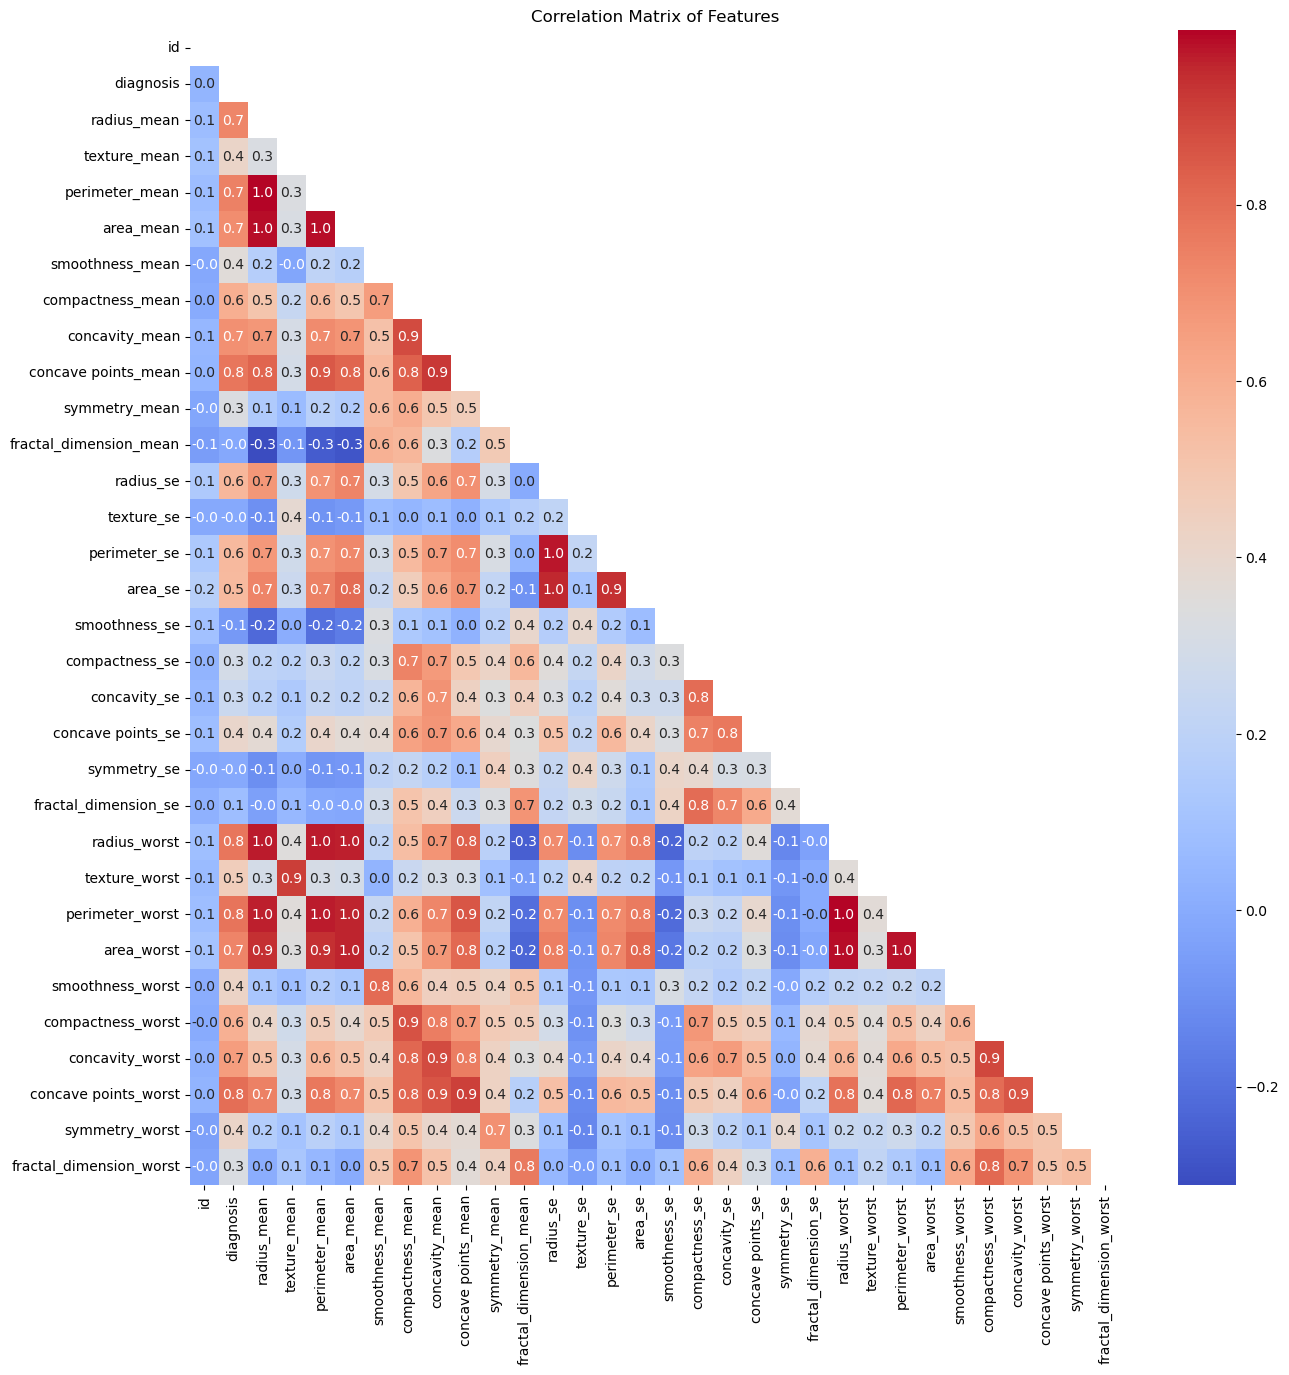

In [38]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True, fmt='.1f', cbar=True,mask=np.triu(np.ones_like(df.corr(),dtype=bool)))
plt.title("Correlation Matrix of Features")
plt.show()

**Highly correlated features**

In [41]:
corr_matrix=df.corr().abs()
mask=np.triu(np.ones_like(corr_matrix,dtype=bool))
tr_df=corr_matrix.mask(mask)
to_drop=[x for x in tr_df.columns if any(tr_df[x]>.92)]

In [43]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [45]:
df.shape

(569, 32)

In [47]:
df.drop(to_drop,axis=1,inplace=True)

In [49]:
df.drop('id',axis=1,inplace=True)

In [51]:
df.shape

(569, 23)

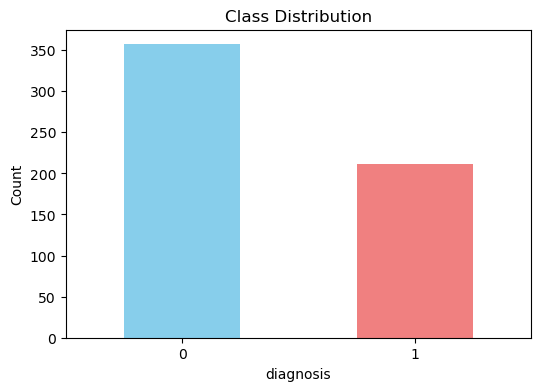

In [53]:
class_counts = df['diagnosis'].value_counts()
class_labels = ['0', '1']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13528\3618964797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_13528\3618964797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')


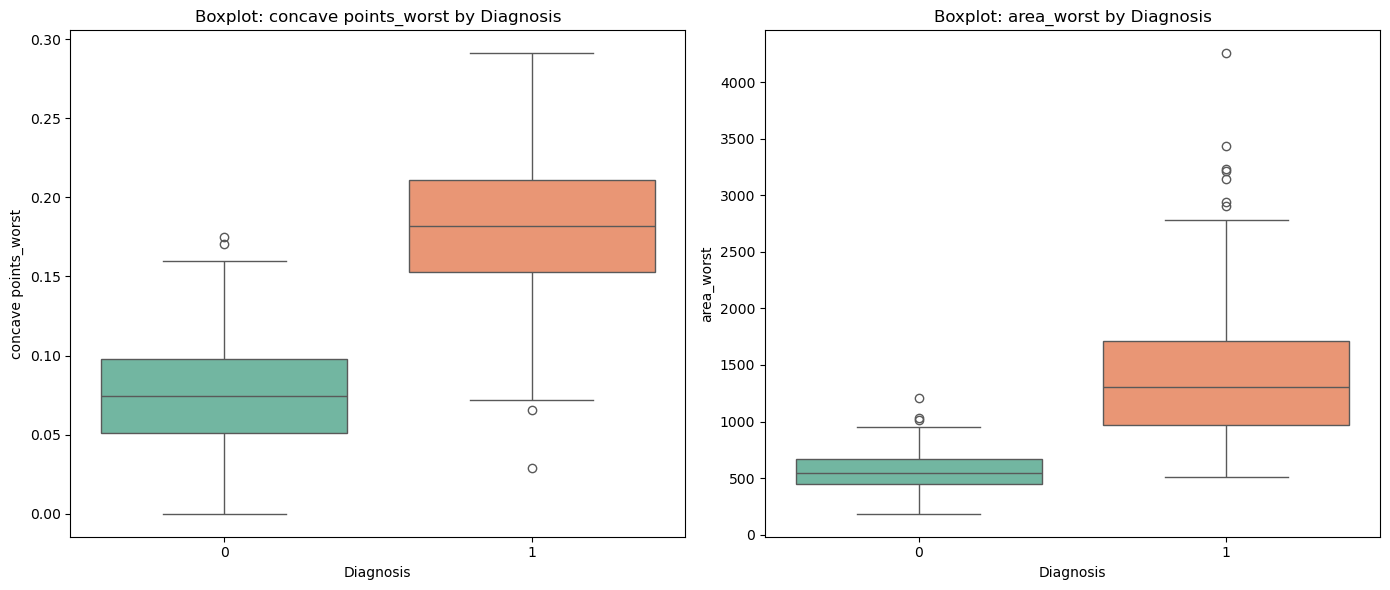

In [55]:
features_to_plot = ['concave points_worst', 'area_worst']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')
    plt.title(f"Boxplot: {feature} by Diagnosis")
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**MODEL**

In [58]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [64]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**LOGISTIC REGRESSION**

In [69]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [71]:
y_predtest=log_reg.predict(X_test)
y_predtrain=log_reg.predict(X_train)

In [73]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train, y_predtrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predtest)}")


Accuracy Score:
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158


In [75]:
print("\nPrecision Score:")
print(f"Train Precision: {precision_score(y_train, y_predtrain)}")
print(f"Test Precision: {precision_score(y_test, y_predtest)}")


Precision Score:
Train Precision: 0.9939393939393939
Test Precision: 0.9761904761904762


In [77]:
print("\nRecall Score:")
print(f"Train Recall: {recall_score(y_train, y_predtrain)}")
print(f"Test Recall: {recall_score(y_test, y_predtest)}")


Recall Score:
Train Recall: 0.9704142011834319
Test Recall: 0.9534883720930233


In [79]:
print("\nClassification Report (Test):")
print(classification_report(y_test, y_predtest))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [81]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predtest))

Confusion Matrix (Test):
[[70  1]
 [ 2 41]]


**KFold & RANDOM FOREST**

In [84]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 

k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

In [86]:
model = RandomForestClassifier(n_estimators=100 , criterion = "entropy" , max_depth= 4 ,random_state= 0)
scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())
model.fit(X_train, y_train)

Cross-validation scores: [0.95614035 0.95614035 0.94736842 0.98245614 0.95575221]
Mean accuracy: 95.9571495109455
Standard deviation: 0.011922704611312757


RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [88]:
y_predTest=model.predict(X_test)
y_predTrain=model.predict(X_train)

In [90]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train, y_predTrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")


Accuracy Score:
Train Accuracy: 0.989010989010989
Test Accuracy: 0.956140350877193


In [92]:
print("\nRecall Score:")
print(f"Train Recall: {recall_score(y_train, y_predTrain)}")
print(f"Test Recall: {recall_score(y_test, y_predTest)}")


Recall Score:
Train Recall: 0.9704142011834319
Test Recall: 0.9069767441860465


In [94]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[70  1]
 [ 4 39]]
